# MIE1624 Final Project

<font color='blue'>Set Up</font>

In [107]:
#Import Libraries

import csv
import random
import numpy as np
import pandas as pd
import nltk
import scipy
from sklearn.decomposition import PCA, SparsePCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import stop_words


In [2]:
list_stop_words = [i for i in stop_words.ENGLISH_STOP_WORDS]
nltk.download('wordnet')
lemma = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sheng\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
print(lemma.lemmatize('les'))

le


In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df = pd.read_csv('metadata.csv',low_memory=False)
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497906 entries, 0 to 497905
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          497906 non-null  object 
 1   sha               172105 non-null  object 
 2   source_x          497906 non-null  object 
 3   title             497674 non-null  object 
 4   doi               281753 non-null  object 
 5   pmcid             182522 non-null  object 
 6   pubmed_id         241936 non-null  object 
 7   license           497906 non-null  object 
 8   abstract          363064 non-null  object 
 9   publish_time      497687 non-null  object 
 10  authors           484020 non-null  object 
 11  journal           464755 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  197568 non-null  object 
 14  arxiv_id          6687 non-null    object 
 15  pdf_json_files    172105 non-null  object 
 16  pmc_json_files    13

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


<font color='blue'>Data Cleaning</font>

In [6]:
# select entries might be useful
df = df[['title','abstract','authors','publish_time']]
df = df.drop_duplicates(subset='abstract', keep="first")
df=df.dropna()



In [7]:
df.shape

(321013, 4)

In [8]:
df.loc[0:100,:]

,title,abstract,authors,publish_time
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,"Crouch, Erika C",2000-08-25
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11
5,Sequence requirements for RNA strand transfer ...,Nidovirus subgenomic mRNAs contain a leader se...,"Pasternak, Alexander O.; van den Born, Erwin; ...",2001-12-17
6,Debate: Transfusing to normal haemoglobin leve...,Recent evidence suggests that critically ill p...,"Alvarez, Gonzalo; Hébert, Paul C; Szick, Sharyn",2001-03-08
7,The 21st International Symposium on Intensive ...,The 21st International Symposium on Intensive ...,"Ball, Jonathan; Venn, Richard",2001-05-02
8,Heme oxygenase-1 and carbon monoxide in pulmon...,"Heme oxygenase-1 (HO-1), an inducible stress p...","Slebos, Dirk-Jan; Ryter, Stefan W; Choi, Augus...",2003-08-07
9,Technical Description of RODS: A Real-time Pub...,This report describes the design and implement...,"Tsui, Fu-Chiang; Espino, Jeremy U.; Dato, Virg...",2003-09-01


In [9]:
# data formatting
list_data = df.values.tolist()

# separate the columns
list_data_title = [i[0] for i in list_data]
list_data_abstract = [i[1] for i in list_data]
list_data_authors = [i[2] for i in list_data]
list_data_publish_time = [i[3] for i in list_data]

data_size = len(list_data)

In [10]:
data_size

321013

In [11]:
# cleaning special characters in title
for idx in range(data_size):
    if type(list_data_title[idx]) == float:
        list_data_title[idx] = ''
    else:
        list_data_title[idx] = list_data_title[idx].lower()\
        .replace('.',' ')\
        .replace('(',' ')\
        .replace(')',' ')\
        .replace(':',' ')\
        .replace('?',' ')\
        .replace(',',' ')\
        .replace(']',' ')\
        .replace('[',' ')\
        .replace('/',' ')\
        .replace('!',' ')\
        .replace('*',' ')\
        .replace('\'',' ')\
        .replace('\"',' ')\
        .replace('-',' ')\
        .replace('&',' ')


In [12]:
# convert column title to be in words
list_data_title_length = []
list_data_title_in_words = []
for idx in range(data_size):
    words = []
    for word in list_data_title[idx].split(' '):
        if (word.isalpha() and (word != '') and (word not in list_stop_words) and (len(word)>=3)):
            words.append(lemma.lemmatize(word))
    list_data_title_in_words.append(words)
    list_data_title_length.append(len(words))

In [13]:
# cleaning special characters in abstract
for idx in range(data_size):
    if type(list_data_abstract[idx]) == float:
        list_data_abstract[idx] = ''
    else:
        list_data_abstract[idx] = list_data_abstract[idx].lower()\
        .replace('.',' ')\
        .replace('(',' ')\
        .replace(')',' ')\
        .replace(':',' ')\
        .replace('?',' ')\
        .replace(',',' ')\
        .replace(']',' ')\
        .replace('[',' ')\
        .replace('/',' ')\
        .replace('!',' ')\
        .replace('*',' ')\
        .replace('\'',' ')\
        .replace('\"',' ')\
        .replace('-',' ')\
        .replace('&',' ')

In [14]:
# convert column abstract to be in words
list_data_abstract_length = []
list_data_abstract_in_words = []
for idx in range(data_size):
    words = []
    for word in list_data_abstract[idx].split(' '):
        if (word.isalpha() and (word != '') and (word not in list_stop_words) and (len(word)>=3)):
            words.append(lemma.lemmatize(word))
    list_data_abstract_in_words.append(words)
    list_data_abstract_length.append(len(words))

<font color='blue'>Feature Processing and Model Development</font>

In [15]:
# create dictionary of all distinct words in title and abstract with index
dict_words_index = {}
word_index = 0
for words in list_data_title_in_words:
    for word in words:
        if word not in dict_words_index:
            dict_words_index[word] = word_index
            word_index += 1
for words in list_data_abstract_in_words:
    for word in words:
        if word not in dict_words_index:
            dict_words_index[word] = word_index
            word_index += 1

# create dictionary of number of article (either title or abstract) each distinct word appears
dict_num_article_appear = {}

# initialization
for word in dict_words_index.keys():
    dict_num_article_appear[word] = 0

# compute count number of times appearing
for idx in range(data_size):
    unique_words = list(set(list_data_title_in_words[idx]).union(set(list_data_abstract_in_words[idx])))
    for word in unique_words:
        dict_num_article_appear[word] += 1

In [16]:
# filter words based on number of articles appeared (1000 is used because the amount of words remained is resirable)
count_threshold = 1000
selected_words = []
for word in dict_words_index.keys():
    if dict_num_article_appear[word] > count_threshold:
        selected_words.append(word)

In [17]:
print('number of words appearing in more than 1000 articles:',len(selected_words))

number of words appearing in more than 1000 articles: 3639


In [18]:
# select the frequent words that might be useful manually
selected_meaningful_words = ['clinical', 'pneumoniae', 'infection', 'university', 'hospital', 'saudi', 'arabia', 'oxide', 'inflammatory', 'mediator', 'lung', 'disease', 'protein', 'pulmonary', 'host', 'gene', 'epithelial', 'cell', 'rna', 'transfer', 'synthesis', 'international', 'medicine', 'carbon', 'surveillance', 'regulation', 'translational', 'mammal', 'nuclear', 'virus', 'identify', 'detection', 'ill', 'patient', 'pathogenicity', 'community', 'contact','vaccination', 'oxidative', 'homology', 'infectious', 'law', 'genomic', 'acid', 'human', 'adult', 'pathogenesis', 'chronic', 'recombination', 'cellular', 'synthetic', 'dna', 'translation', 'vivo', 'australian', 'amino', 'neutrophil', 'serine', 'protease', 'nucleic', 'diagnostic', 'immune', 'epitope', 'reactivity', 'pcr', 'metapneumovirus', 'copd', 'european', 'cancer', 'japanese', 'drug', 'hiv', 'china', 'monoclonal', 'antibody', 'therapeutic', 'perception', 'influenza', 'pandemic', 'obstructive', 'transmission', 'outbreak', 'europe', 'america', 'ventilator', 'pneumonia', 'enterovirus', 'attenuated', 'molecular', 'modeling', 'epidemic', 'genetic', 'replication', 'endogenous', 'micro', 'mrna', 'biopsy', 'respiratory', 'syndrome', 'pathogen', 'ebola', 'cytokine', 'effusion', 'illness', 'cognitive', 'dysfunction', 'mammalian', 'receptor', 'transmissibility', 'pathogenic', 'avian', 'poultry', 'coli', 'polymorphism', 'bacterial', 'genotype', 'spectrometry', 'foot', 'mouth', 'mouse', 'macrophage', 'ass', 'biological', 'transcript', 'extracellular', 'mutation', 'enzymatic', 'malaria', 'vaccine', 'motif' , 'pharmaceutical', 'household', 'chicken', 'zoonotic', 'peptide', 'intracellular', 'cytotoxicity', 'biology', 'polymerase', 'transcriptional', 'paediatric', 'genome', 'dengue', 'evolution', 'activation', 'dog', 'obesity', 'therapy', 'child', 'triage', 'turkey', 'season', 'diagnosis', 'sepsis', 'immunodeficiency', 'taiwan', 'rhinovirus', 'apoptosis', 'recruitment', 'viral', 'recombinant', 'autoimmune', 'antigen', 'infectivity', 'immunogenicity', 'predominantly', 'italy', 'blood', 'bovine', 'bayesian', 'mucosal', 'inflammation', 'home', 'face', 'mask', 'stem', 'piglet', 'oral', 'virulent', 'rotavirus', 'enteric', 'antagonist', 'ifn', 'gamma', 'hong', 'kong', 'infiltration', 'propagation', 'agent', 'climate', 'asia', 'africa', 'endothelial', 'animal', 'injury', 'diffuse', 'alveolar', 'tissue', 'cytotoxic', 'liver', 'nasal', 'adenovirus', 'bypass', 'immunity', 'carrier', 'psychological','australia', 'hemorrhagic', 'assay', 'fusion', 'antiviral', 'person', 'vaccinated', 'hospitalized', 'biomarkers', 'fever', 'kinase', 'phosphorylation', 'bird', 'market', 'antimicrobial', 'antioxidant', 'medicinal', 'plant', 'chinese', 'temperature', 'malignant', 'resistance', 'canine', 'genetically', 'hygiene', 'immunocompromised', 'envelope', 'glycoprotein', 'airway', 'epithelium', 'cleavage', 'circulating', 'epidemiological', 'fluorescent', 'transcriptase', 'phylogenetic', 'invasive', 'sclerosis', 'chest', 'pathology', 'icu', 'syncytial', 'colorectal', 'rural', 'migration', 'prolonged', 'extracorporeal', 'membrane', 'oxygenation', 'healthcare', 'angiotensin', 'enzyme', 'interferon', 'virulence', 'crystal', 'prevalence', 'porcine', 'diarrhea', 'pregnancy', 'interstitial', 'swine', 'flu', 'transplant', 'tracheal', 'bronchitis', 'cat', 'software', 'respirator', 'medical', 'dental', 'student', 'murine', 'environment', 'air', 'radiation', 'doe', 'fluorescence', 'isolation', 'fatal', 'environmental', 'enriched', 'plasma', 'virion', 'hepatitis', 'organ', 'pig', 'staphylococcus', 'aureus', 'seasonal', 'germany', 'virology', 'necrosis', 'mortality', 'tuberculosis' , 'serological', 'nucleotide', 'sars', 'tomography', 'tumor', 'vessel', 'pharmacological', 'immunization', 'cardiac', 'dendritic', 'lipid', 'neutralization', 'serum', 'albumin', 'vascular', 'novo', 'inhibitory', 'radiological', 'prevalent', 'sputum', 'fibrosis', 'renin', 'mutant', 'symptom', 'biomarker', 'genetics', 'hand', 'calcium', 'economic', 'indian', 'igm', 'lymph', 'placebo', 'urine', 'arthritis', 'neck', 'phenotype', 'nurse', 'canada', 'encephalitis', 'infant', 'asthma', 'ligand', 'igg', 'stimulation', 'physiological', 'pathological', 'seroprevalence', 'preclinical', 'adjuvant', 'sex', 'surgical', 'italian', 'nanoparticles', 'immunoassay', 'england', 'ion', 'ventilation', 'protocol', 'pediatric', 'stimulated', 'fitness', 'antibiotic', 'metabolic', 'diabetes', 'morphology', 'spreading', 'nursing', 'transmissible', 'epidemiology', 'prognosis', 'maternal', 'canadian', 'dissection', 'ray', 'monocyte', 'lineage', 'heart', 'diagnostics', 'cardiovascular', 'molecule', 'inhibitor', 'metal', 'noninvasive', 'immunological', 'mitochondrial', 'genus', 'lymphocyte', 'education', 'edema', 'transport', 'bone', 'marrow', 'graft', 'transplantation', 'mhv', 'ards', 'conformation', 'von', 'milk', 'adhesion', 'plaque', 'demographic', 'etiological', 'histological', 'autopsy', 'renal', 'microbial', 'antigenic', 'african', 'congenital', 'leukocyte', 'platelet', 'brain', 'tropism', 'spectrum', 'netherlands', 'disorder', 'oxygen', 'muscle', 'humoral', 'transfusion', 'rsv', 'cold', 'airborne', 'procalcitonin', 'bat', 'thermal', 'cattle', 'cochrane', 'rat', 'neonate', 'summer', 'fall', 'winter', 'trauma', 'chemical', 'feline', 'transmembrane', 'dissemination', 'silico', 'immunoglobulin', 'percutaneous', 'resection', 'carcinoma', 'septic', 'swab', 'overexpression', 'ocular', 'inoculation', 'innate', 'etiology', 'nerve', 'vulnerability', 'interleukin', 'cns', 'spontaneous', 'breathing', 'homeostasis', 'pregnant', 'campaign', 'nosocomial', 'specimen', 'lesion', 'mri', 'urinary', 'clinic', 'spain', 'bioinformatics', 'magnetic', 'usa', 'stool', 'symptomatic', 'embolism', 'gastroenteritis', 'catalytic', 'bacteria', 'breath', 'neurological', 'disability', 'venous', 'thromboembolism', 'surrogate', 'sequela', 'france', 'cutaneous', 'aerosol', 'hospitalization', 'clinician', 'coronary', 'artery', 'microscopy', 'japan', 'tnf', 'contamination', 'plastic', 'sodium', 'pollution', 'immunosuppression', 'intestine', 'calf', 'korea', 'india', 'financial', 'quarantine', 'hypoxia', 'metastasis', 'immunosuppressive', 'organic', 'liquid', 'neuron', 'preoperative', 'creatinine', 'sensor', 'veterinary', 'proinflammatory', 'urban', 'potency', 'breast', 'ischemic', 'diabetic', 'transformation', 'arm', 'malignancy', 'cerebral', 'hemorrhage', 'hepatic', 'parainfluenza', 'psychosocial', 'elderly', 'caregiver', 'humidity', 'intestinal', 'gas', 'escherichia', 'brazil', 'ward', 'prophylaxis', 'german', 'neonatal', 'postoperative', 'corticosteroid', 'head', 'incubation', 'hormone', 'thoracic', 'radiographic', 'fetal', 'traffic', 'dietary', 'stimulate', 'toxicity', 'hospitalisation', 'morbidity', 'vesicle', 'colon' , 'hypertension', 'dehydrogenase', 'bronchoalveolar', 'lavage', 'gastric', 'gel', 'oncology', 'endemic', 'hot', 'blind', 'pathophysiology', 'kinetics', 'bleeding', 'arterial', 'neural', 'clinically', 'regimen', 'microbiological', 'pleural', 'allele', 'tumour', 'ecosystem', 'scoping', 'glucose', 'korean', 'immunomodulatory', 'transcription', 'fda', 'diarrhoea', 'metabolism', 'preterm', 'skin', 'comorbidities', 'dysregulation', 'heat', 'immunotherapy', 'nucleocapsid', 'coagulation', 'substrate', 'fatty', 'machinery', 'fecal', 'resilience', 'nutritional', 'bowel', 'gut', 'microorganism', 'psychiatric', 'traumatic', 'qpcr', 'cough', 'steroid', 'circulation', 'ischemia', 'immunosorbent', 'abdominal', 'modern', 'biomedical', 'fatigue', 'intubated', 'adolescent', 'immunohistochemistry', 'heavy', 'coronavirus', 'hoc', 'practitioner', 'epidemiologic', 'wound', 'spinal', 'suspected', 'prototype','surgery', 'chloroquine', 'scopus', 'gastrointestinal', 'lens', 'zika', 'globally', 'metabolite', 'microbe', 'dialysis', 'indoor', 'serology', 'azithromycin', 'equipment', 'mechanistic', 'ultrasound', 'antibacterial', 'gathering','forest', 'intracranial', 'visible', 'light', 'transportation', 'retention', 'mexico', 'fungal', 'inpatient', 'insulin', 'ecological', 'nasopharyngeal', 'hydrogen', 'iran', 'prophylactic', 'intraoperative', 'vero', 'intravenous', 'thrombotic', 'rehabilitation', 'mellitus', 'saliva', 'diet', 'alcohol', 'spleen', 'chemistry', 'radiology', 'ventilated', 'nose', 'transmitted', 'mucosa', 'blocker', 'replicate', 'radiologist', 'mental', 'vein', 'comorbidity', 'chromatography', 'distal', 'ibv', 'singapore', 'iga', 'myocardial', 'chemotherapy', 'heparin', 'bilateral', 'alanine', 'hemoglobin', 'infusion', 'inoculated', 'nutrition', 'cavity', 'remdesivir', 'neurologic', 'nucleus', 'coagulopathy', 'dyspnea', 'hospitalised', 'vitamin', 'biochemical', 'dementia', 'aortic', 'catheter', 'cardiopulmonary', 'laparoscopic', 'obese', 'ventricular', 'telehealth', 'hernia', 'led', 'hypoxemia', 'limb', 'stressor', 'dimer', 'oropharyngeal', 'intubation', 'cytometry', 'anesthesia', 'optical', 'olfactory', 'lactate', 'immunofluorescence', 'switzerland', 'cure', 'confinement', 'diffusion', 'metastatic', 'comorbid', 'histopathological', 'perioperative', 'aneurysm', 'sore', 'throat', 'laparoscopy', 'thrombosis', 'anticoagulation', 'myalgia',  'rectal', 'cerebrovascular', 'immunized', 'contagion', 'lymphopenia', 'stent','surgeon', 'cov', 'covid', 'contagious', 'synthesized', 'vomiting', 'anticoagulant', 'infrared', 'hubei', 'nitrogen', 'senior', 'telemedicine', 'emission', 'corona', 'rcts', 'robotic', 'endoscopic', 'palliative', 'cox','economy', 'endoscopy', 'smoking', 'arrhythmia', 'hydroxychloroquine', 'una', 'lobe', 'rdrp', 'lockdown', 'endovascular', 'crp', 'angiography', 'pathophysiological', 'seir', 'socioeconomic', 'stimulus', 'rbd', 'ferritin', 'multisystem', 'ncov', 'ldh', 'anatomical', 'pharmacy', 'sociodemographic', 'pubmed','prisma', 'coronaviruses', 'mers', 'hcov', 'lopinavir', 'ritonavir', 'medline', 'cdc', 'nausea', 'roc', 'fatality', 'pacientes', 'pandemia', 'ppe', 'bmi', 'epicenter', 'postoperatively', 'reopening', 'reagent', 'tocilizumab', 'anosmia', 'troponin', 'auc', 'ieee', 'incision', 'suture', 'clinicaltrials', 'detrimental', 'headache', 'thromboembolic', 'suspicion', 'prospero', 'hcws', 'como','embase', 'durante', 'covs', 'spss', 'gathered', 'cinahl', 'aor', 'iqr', 'interquartile', 'psycinfo']
print('number of meaningful words selected:' ,len(selected_meaningful_words))

number of meaningful words selected: 836


In [19]:
# update word dictionaries
selected_words_index = {}
word_index = 0
for word in selected_meaningful_words:
    selected_words_index[word] = word_index
    word_index += 1

In [20]:
# transform the dataset, if the article has the word in title or abstract - 1, otherwise - 0
N_selected_words = len(selected_meaningful_words)
X_1 = np.zeros([data_size,N_selected_words])
for i in range(data_size):
    for word in list(set(list_data_title_in_words[i]).union(set(list_data_abstract_in_words[i]))):
        if word in selected_meaningful_words:
            X_1[i, selected_words_index[word]] =  1

In [21]:
# normalization of data for PCA
norm_X_1 = StandardScaler().fit_transform(X_1)

In [22]:
# apply PCA
pca = PCA(n_components=400, random_state=0)
pca_X_1 = pca.fit_transform(X_1)

In [23]:
# too many classes are not desired (thus not using the heuristics mentioned in class)
# many articles only have several keywords and are hard to be classified
# we want the articles having many overlapping words can be classfied as one class, so the number of classes cannot be too small
# 20 is a medium size

N_class = 20
kmeans = KMeans(n_clusters=N_class, random_state=0).fit(X_1)

In [ ]:
# split into classes, each class has some features about same topic (e.g. virus, impact to community) because the articles have similar keywords,
# each classes will tell different story about COVID-19, we can also see what other keywords can be extended from class
# some sars come from sars, some come from sars-cov-2 or sars-cov (check difference between sars and cov)
# some cov come from short-form of coronavirus too

In [24]:
# number of articles in each class
N_articles_in_classes = [list(kmeans.labels_).count(i) for i in range(N_class)]

In [25]:
# compute the percentage of articles (in a cluster) a word appears for each word and for each cluster
count_summary_classes = np.zeros([N_class, N_selected_words])
for i in range(data_size):
    class_id = kmeans.labels_[i]
    count_summary_classes[class_id,:] += X_1[i,:]

percent_summary_classes = np.zeros([N_class, N_selected_words])
for i in range(N_class):
    percent_summary_classes[i,:] = count_summary_classes[i,:] / N_articles_in_classes[i]

In [26]:
# compute number of covid articles in each class and percentage of covid articles in each class
N_covid_articles_in_classes = [count_summary_classes[i,selected_words_index['covid']] for i in range(N_class)]
percent_covid_articles_in_classes = list(np.array(N_covid_articles_in_classes) / np.array(N_articles_in_classes))

In [27]:
# see which clusters have mainly covid articles, then they can tell stories about COVID-19
percent_covid_articles_in_classes

[0.026591951095262353,
 0.8498911040375272,
 0.021761740939275142,
 0.9604591165166114,
 0.805547529615718,
 0.879668613336955,
 0.8001278363694471,
 0.04062870699881376,
 0.04602991944764097,
 0.9159238737653578,
 0.07586966787344562,
 0.7863532713559025,
 0.9741786299258117,
 0.017410071942446044,
 0.8427610936799641,
 0.3503126628452319,
 0.9617008883063929,
 0.7816715769886804,
 0.027357050604673007,
 0.0]

In [152]:
# classes informative for covid: 1,3,4,5,6,9,11,12,14,16,17
# overall: respiratory syndrome coronavirus 2 (SARS-CoV-2), the virus that causes covid 19
# class 0: about surgery and patient, not much covid, surgery is not much relevant to covid
# class 1: respiratory, chest, pneumonia, china, pcr testing,symptom 83%, fever,cough,fatigue,dyspnea, lung, comorbidities, headache, myalgia
# class 2: no info
# class 3: no sars, no cov (meaning this is more for media): nothing technical
# class 4: pandemic (nothing technical)
# class 5: inflammation, lung, angiotensin receptor/-converting enzyme inhibitor, pulmonary
# increase susceptibility to coronavirus SARS CoV-2 (the viral agent that causes the disease COVID-19) and the likelihood of severe COVID-19 illness
# https://www.who.int/news-room/commentaries/detail/covid-19-and-the-use-of-angiotensin-converting-enzyme-inhibitors-and-receptor-blockers
# class 6: about respiratory, coronavirus -> sars, mers
# class 7: no info
# class 8: no info
# class 9: nothing new
# class 11: about drug(main, 83%), antiviral,fda, remdesivir
# Remdesivir was authorized with conditions in Canada on July 27, 2020. It was authorized for the treatment of severe COVID-19 in adults and youth (aged 12 years and over and weighing at least 40 kg) with pneumonia requiring supplemental oxygen
# https://www.canada.ca/en/health-canada/services/drugs-health-products/covid19-industry/drugs-vaccines-treatments/remdesivir-update.html
# class 12: highly label pandemic, as pandemic about lockdown, community, economic, education
# class 13: about some general virus info
# class 14: ventilation, icu helps, mortality (indicating this class is about severe cases (thus icu, ventilation)) causing death, comorbidities, diabetes and hypertension can cause more severe, cardiac
# class 16: pandemic, transmission, economic, lockdown
# class 17: detections,swab, diagnosis, we know this is about how to detect covid: assay, pcr test, nasopharyngeal, serum/serological for antibody test igg igm
# class 18: influenza, rhinovirus, nasopharyngeal, adenovirus; covid not in it, it is not a flu like Trump said!
# class 19: no info


In [150]:
# edit '11' to different class id (0 to 19) to view for percentage summary for each cluster
df_id = pd.DataFrame(percent_summary_classes[11,:], index = selected_meaningful_words,columns = ['count_percent']).sort_values('count_percent',ascending = 0)

In [151]:
df_id

,count_percent
sars,0.940186
cov,0.905981
drug,0.838976
covid,0.786353
coronavirus,0.598491
viral,0.555341
virus,0.531310
antiviral,0.505350
protein,0.502719
pandemic,0.501491


In [118]:
# view size of each cluster
N_articles_in_classes

[9815,
 5969,
 24998,
 18993,
 20766,
 7363,
 15645,
 13488,
 16511,
 16604,
 6353,
 5701,
 41516,
 13900,
 11155,
 7676,
 20601,
 6449,
 8517,
 48993]

<font color='blue'>Exploratory Data Analysis and Visualization</font>

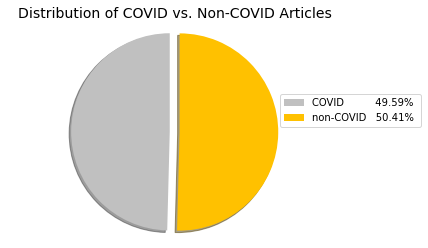

In [120]:
# Pie Chart of Covid article vs. non-Covid articles
covid_data_size = np.sum(N_covid_articles_in_classes)
noncovid_data_size = data_size - covid_data_size
overall_rate_pcts = [covid_data_size/data_size, noncovid_data_size/data_size]
labels = ['COVID          ', 'non-COVID   ']
labels = [labels[i] + str(round(100*overall_rate_pcts[i],2)) + '% ' for i in range(len(labels))]
sizes = [covid_data_size, noncovid_data_size]
explode = [0.1, 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,
        shadow=True, startangle=90, colors=['silver','#ffc100'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels,bbox_to_anchor=(0.8, 0.7))
plt.title('Distribution of COVID vs. Non-COVID Articles', fontsize="14")
plt.show()

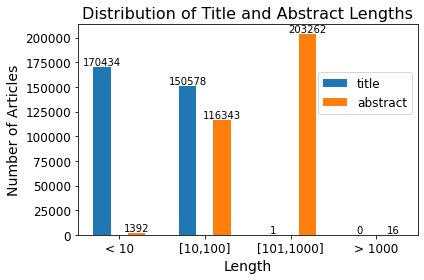

In [92]:
# Generate Bar plot
title_len_bin_1 = 0
title_len_bin_2 = 0
title_len_bin_3 = 0
title_len_bin_4 = 0
for i in range(data_size):
    if list_data_title_length[i] < 10:
        title_len_bin_1 += 1
    elif list_data_title_length[i] <= 100:
        title_len_bin_2 += 1
    elif list_data_title_length[i] <= 1000:
        title_len_bin_3 += 1
    else: 
        title_len_bin_4 += 1

abstract_len_bin_1 = 0
abstract_len_bin_2 = 0
abstract_len_bin_3 = 0
abstract_len_bin_4 = 0
for i in range(data_size):
    if list_data_abstract_length[i] < 10:
        abstract_len_bin_1 += 1
    elif list_data_abstract_length[i] <= 100:
        abstract_len_bin_2 += 1
    elif list_data_abstract_length[i] <= 1000:
        abstract_len_bin_3 += 1
    else: 
        abstract_len_bin_4 += 1
        
labels = ["< 10","[10,100]","[101,1000]","> 1000"]

x = 1.5 * np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [title_len_bin_1,title_len_bin_2,title_len_bin_3,title_len_bin_4], width-0.3, label='title')
rects2 = ax.bar(x + width/2, [abstract_len_bin_1,abstract_len_bin_2,abstract_len_bin_3,abstract_len_bin_4], width-0.3, label='abstract')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Articles', fontsize="14")
ax.set_xlabel('Length', fontsize="14")
ax.set_title('Distribution of Title and Abstract Lengths', fontsize="16")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=12, bbox_to_anchor = (1,0.8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

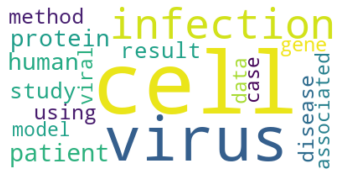

In [118]:
# generate word cloud
list_example_words = []
for i in range(1000):
    list_example_words.extend(list_data_title_in_words[i])
    list_example_words.extend(list_data_abstract_in_words[i])
example_words = ' '.join(list_example_words)
wordcloud = WordCloud(max_words=100,background_color='white',min_font_size = 12).generate(example_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()